In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
df = pd.read_csv('./test.csv',encoding='euc-kr')
df

,idx,gender,mbti,sc_goal,toeic,teps,toeic_sp,opic,st_method,major,sucss
0,1,남,INTP,855,715,0,0,0,독학,공과계열,0
1,2,남,ENTJ,800,710,0,0,850,독학,공과계열,1
2,3,여,INFP,750,0,0,750,0,학원,인문계열,1
3,4,남,ESTP,850,750,0,0,0,학원,자연과학계열,0
4,5,여,ENFJ,900,700,0,0,0,인강,사회계열,0
...,...,...,...,...,...,...,...,...,...,...,...
213,214,여,INFJ,800,0,0,800,0,학원,자연과학계열,1
214,215,남,ENTP,800,0,0,0,950,독학,사회계열,1
215,216,남,ENTP,800,0,0,0,850,독학,사회계열,0
216,217,여,INFJ,800,0,700,0,0,학원,자연과학계열,1


In [3]:
df.columns
s = ['toeic', 'teps', 'toeic_sp', 'opic']
for e in s:
    for i in range(len(df)):
        if df[e][i] > 0 :
            df[e][i] = 1
        else :
            df[e][i] = 0

C:\Users\admin\AppData\Local\Temp\ipykernel_1376\3687464101.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[e][i] = 1
C:\Users\admin\AppData\Local\Temp\ipykernel_1376\3687464101.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[e][i] = 0


In [9]:
gdf = df.groupby('st_method')[['toeic','teps','toeic_sp','opic']].sum()
gdf = gdf.copy()
gdf

,toeic,teps,toeic_sp,opic
st_method,,,,
독학,52,13,24,50
스터디,12,12,0,0
인강,12,24,12,0
학원,40,1,14,12


In [5]:
co=df['st_method'].unique()
co = list(co)
bb = [[co[e] for i in range(4)] for e in range(len(co))]
bb = sum(bb,[])
aa = pd.DataFrame()
for e in co:
    aa = pd.concat([aa, gdf[e]],axis=0)
aa.columns = ['선호도']
aa['st_method'] = bb
aa = aa.reset_index()
aa.columns = ['시험종류','선호도','공부방법']
aa

,시험종류,선호도,공부방법
0,toeic,52.0,독학
1,teps,13.0,독학
2,toeic_sp,24.0,독학
3,opic,50.0,독학
4,toeic,40.0,학원
5,teps,1.0,학원
6,toeic_sp,14.0,학원
7,opic,12.0,학원
8,toeic,12.0,인강
9,teps,24.0,인강


<AxesSubplot:xlabel='시험종류', ylabel='선호도'>

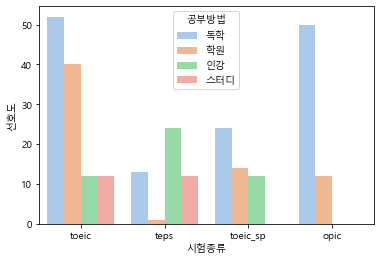

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 지정
plt.rc('font', family = "Malgun Gothic")
sns.set_palette("pastel")
sns.barplot(x='시험종류', y='선호도',hue='공부방법',data=aa)

In [10]:
tdf = pd.read_csv('./test.csv',encoding='euc-kr')
tdf

,idx,gender,mbti,sc_goal,toeic,teps,toeic_sp,opic,st_method,major,sucss
0,1,남,INTP,855,715,0,0,0,독학,공과계열,0
1,2,남,ENTJ,800,710,0,0,850,독학,공과계열,1
2,3,여,INFP,750,0,0,750,0,학원,인문계열,1
3,4,남,ESTP,850,750,0,0,0,학원,자연과학계열,0
4,5,여,ENFJ,900,700,0,0,0,인강,사회계열,0
...,...,...,...,...,...,...,...,...,...,...,...
213,214,여,INFJ,800,0,0,800,0,학원,자연과학계열,1
214,215,남,ENTP,800,0,0,0,950,독학,사회계열,1
215,216,남,ENTP,800,0,0,0,850,독학,사회계열,0
216,217,여,INFJ,800,0,700,0,0,학원,자연과학계열,1


In [12]:
# t검정을 활용해서 순위매기기(토익)
df_test = tdf['toeic'] # 토익에 대해서만 체크
df_total_toeic = pd.DataFrame() # 빈 데이터프레임 작성
from itertools import combinations
a = list(combinations(co, 2))
q = []
w = []
for i in range(len(a)):
    q.append(a[i][0])
    w.append(a[i][1])
for i in range(len(q)):
    e = df_test[tdf['st_method'] == q[i]]
    r = df_test[tdf['st_method'] == w[i]]
    statis, pv = stats.ttest_ind(e, r)
    df_temp = pd.DataFrame({'비교대상' : [q[i]+' vs '+w[i]], '검정통계량' : abs(statis), 'p-value' : pv})
    df_total_toeic = pd.concat([df_total_toeic, df_temp])
df_total_toeic

,비교대상,검정통계량,p-value
0,독학 vs 학원,0.983941,3.266680e-01
0,독학 vs 인강,4.081725,7.556976e-05
0,독학 vs 스터디,2.411501,1.769302e-02
0,학원 vs 인강,4.559168,1.308951e-05
0,학원 vs 스터디,1.686327,9.578089e-02
0,인강 vs 스터디,5.899152,1.997621e-07


In [13]:
# t검정을 활용해서 순위매기기(텝스)
df_test = tdf['teps'] # 텝스에 대해서만 체크
df_total_teps = pd.DataFrame() # 빈 데이터프레임 작성
from itertools import combinations
a = list(combinations(co, 2))
q = []
w = []
for i in range(len(a)):
    q.append(a[i][0])
    w.append(a[i][1])
for i in range(len(q)):
    e = df_test[tdf['st_method'] == q[i]]
    r = df_test[tdf['st_method'] == w[i]]
    statis, pv = stats.ttest_ind(e, r)
    df_temp = pd.DataFrame({'비교대상' : [q[i]+' vs '+w[i]], '검정통계량' : abs(statis), 'p-value' : pv})
    df_total_teps = pd.concat([df_total_teps, df_temp])
df_total_teps

,비교대상,검정통계량,p-value
0,독학 vs 학원,2.908607,4.160687e-03
0,독학 vs 인강,3.662304,3.560845e-04
0,독학 vs 스터디,7.291734,7.022934e-11
0,학원 vs 인강,7.427337,2.258773e-11
0,학원 vs 스터디,27.783977,7.003716e-42
0,인강 vs 스터디,4.541170,2.878119e-05


In [14]:
# t검정을 활용해서 순위매기기(토익스피킹)
df_test = tdf['toeic_sp'] # 토익스피킹에 대해서만 체크
df_total_toeic_sp = pd.DataFrame() # 빈 데이터프레임 작성
from itertools import combinations
a = list(combinations(co, 2))
q = []
w = []
for i in range(len(a)):
    q.append(a[i][0])
    w.append(a[i][1])
for i in range(len(q)):
    e = df_test[tdf['st_method'] == q[i]]
    r = df_test[tdf['st_method'] == w[i]]
    statis, pv = stats.ttest_ind(e, r)
    df_temp = pd.DataFrame({'비교대상' : [q[i]+' vs '+w[i]], '검정통계량' : abs(statis), 'p-value' : pv})
    df_total_toeic_sp = pd.concat([df_total_toeic_sp, df_temp])
df_total_toeic_sp

,비교대상,검정통계량,p-value
0,독학 vs 학원,0.540542,0.589594
0,독학 vs 인강,0.172941,0.862953
0,독학 vs 스터디,2.025181,0.045487
0,학원 vs 인강,0.301366,0.763690
0,학원 vs 스터디,1.757391,0.082826
0,인강 vs 스터디,1.966384,0.054046


In [15]:
# t검정을 활용해서 순위매기기(오픽)
df_test = tdf['opic'] # 오픽에 대해서만 체크
df_total_opic = pd.DataFrame() # 빈 데이터프레임 작성
from itertools import combinations
a = list(combinations(co, 2))
q = []
w = []
for i in range(len(a)):
    q.append(a[i][0])
    w.append(a[i][1])
for i in range(len(q)):
    e = df_test[tdf['st_method'] == q[i]]
    r = df_test[tdf['st_method'] == w[i]]
    statis, pv = stats.ttest_ind(e, r)
    df_temp = pd.DataFrame({'비교대상' : [q[i]+' vs '+w[i]], '검정통계량' : abs(statis), 'p-value' : pv})
    df_total_opic = pd.concat([df_total_opic, df_temp])
df_total_opic

,비교대상,검정통계량,p-value
0,독학 vs 학원,5.769080,4.161184e-08
0,독학 vs 인강,7.579520,4.704768e-12
0,독학 vs 스터디,3.780079,2.655190e-04
0,학원 vs 인강,3.207895,1.739911e-03
0,학원 vs 스터디,1.597466,1.142578e-01
0,인강 vs 스터디,NaN,NaN
